In [14]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Вспомогательная функция
def plot_results():
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
    plt.legend()
    plt.show()    
    
    plt.figure()
    plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
    plt.legend()
    plt.show()    
    
    print("Минимальное значение функции потерь:{:.4f} Эпоха: {}".format(np.min(history.history['val_loss']), 
                                                                np.argmin(history.history['val_loss']) + 1))
    print("Максимальное значение accuracy:{:.4f} Эпоха: {}".format(np.max(history.history['val_acc']), 
                                                                np.argmax(history.history['val_acc']) + 1))

In [5]:
max_features =10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
x_train = sequence.pad_sequences(x_train, maxlen)
x_test = sequence.pad_sequences(x_test, maxlen)


In [18]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train,
                   epochs = 40,
                   batch_size = 128,
                   validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 38s 2ms/step - loss: 0.5143 - acc: 0.7585 - val_loss: 0.4404 - val_acc: 0.7962
Epoch 2/40
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2985 - acc: 0.8841 - val_loss: 0.4297 - val_acc: 0.8074
Epoch 3/40
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2384 - acc: 0.9122 - val_loss: 0.2914 - val_acc: 0.8780
Epoch 4/40
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2033 - acc: 0.9265 - val_loss: 0.3382 - val_acc: 0.8510
Epoch 5/40
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1814 - acc: 0.9341 - val_loss: 0.3174 - val_acc: 0.8668
Epoch 6/40
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1593 - acc: 0.9430 - val_loss: 0.3052 - val_acc: 0.8732
Epoch 7/40
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1463 - acc: 0.9470 - val_loss: 0.4210 - val_acc:

In [19]:
model.save('./RNN models and data  for chapter 6/IMDB_models/Bidirectional_LSTM_model.h5')

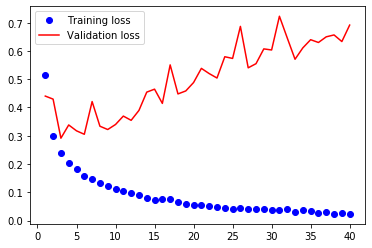

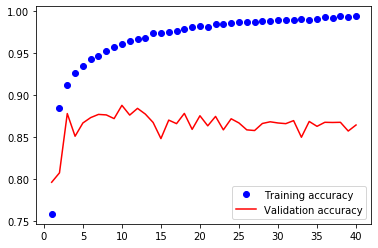

Минимальное значение функции потерь:0.2914 Эпоха: 3
Максимальное значение accuracy:0.8878 Эпоха: 10


In [20]:
plot_results()